## Step 1- Reading Data into Python

In [453]:
import pandas as pd
import numpy as np


In [454]:
import warnings
warnings.filterwarnings('ignore')

In [455]:
diamondpricesdata = pd.read_csv("DiamondPricesData.csv",sep= ',',encoding = 'latin-1')

In [456]:
diamondpricesdata

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


## Step 2- Defining the Problem Statement

In [457]:
print(type(diamondpricesdata))

<class 'pandas.core.frame.DataFrame'>


In [458]:
pd.options.display.max_columns = 10
pd.options.display.max_rows = 100
carpricesdata

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


## Step 3- Defining Type of Machine Learning

In [459]:
print('Shape before deleting duplicates', diamondpricesdata.shape)
carpricesdata = diamondpricesdata.drop_duplicates()
print('Shape after deleting duplicates', diamondpricesdata.shape)

Shape before deleting duplicates (53940, 10)
Shape after deleting duplicates (53940, 10)


## Step 4 - Looking the Distribution of Target Variable

In [460]:
diamondpricesdata.head(5)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [461]:
diamondpricesdata.tail(5)

,price,carat,cut,color,clarity,depth,table,x,y,z
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74
53939,2757,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64


In [462]:
import os
os.getcwd()

'C:\\Users\\Administrator\\Project Machine Learning\\Diamond Price Predictor'

## Step 5- Basic Data Exploration

In [463]:
diamondpricesdata.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

In [464]:
diamondpricesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [465]:
diamondpricesdata.describe()

,price,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [466]:
diamondpricesdata.describe(include = 'all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53940.000000,53940.000000,53940,53934,53940,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11286,13065,NaN,NaN,NaN,NaN,NaN
mean,3932.799722,0.797940,NaN,NaN,NaN,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,NaN,NaN,NaN,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000


In [467]:
diamondpricesdata.shape

(53940, 10)

In [468]:
diamondpricesdata.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [469]:
diamondpricesdata.values

array([[326, 0.23, 'Ideal', ..., 3.95, 3.98, 2.43],
       [326, 0.21, 'Premium', ..., 3.89, 3.84, 2.31],
       [327, 0.23, 'Good', ..., 4.05, 4.07, 2.31],
       ...,
       [2757, 0.7, 'Very Good', ..., 5.66, 5.68, 3.56],
       [2757, 0.86, 'Premium', ..., 6.15, 6.12, 3.74],
       [2757, 0.75, 'Ideal', ..., 5.83, 5.87, 3.64]], dtype=object)

In [470]:
diamondpricesdata.iloc[0:5]

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [471]:
subset = diamondpricesdata.iloc[[1,5,8,6,7],[0,5,4,2]]
subset = subset.reset_index(drop = True)
subset

,price,depth,clarity,cut
0,326,59.8,SI1,Premium
1,336,NaN,VVS2,Very Good
2,337,65.1,VS2,Fair
3,336,62.3,VVS1,Very Good
4,337,61.9,SI1,Very Good


## Step 6- Visual Exploratory Data Analysis

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

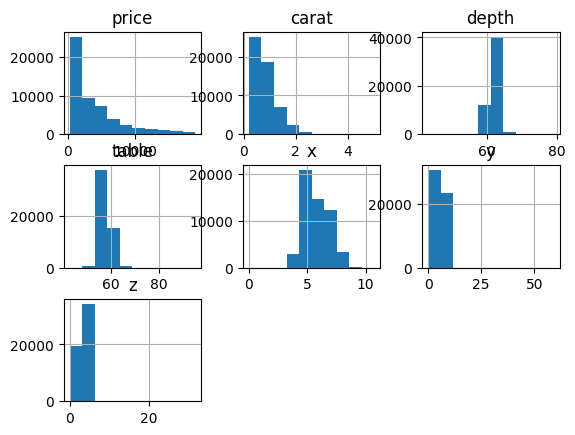

In [472]:
import matplotlib.pyplot as plt
diamondpricesdata.hist()


<Axes: >

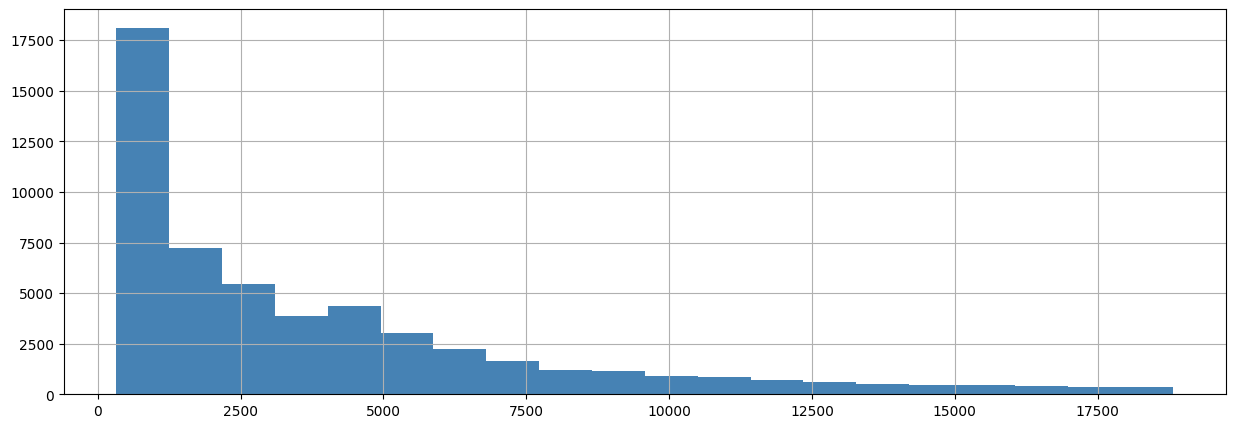

In [473]:
diamondpricesdata['price'].hist(figsize = (15,5),color ='steelblue',bins =20)

In [474]:
carpricesdata.groupby(['cut']).size()

cut
Fair          1598
Good          4891
Ideal        21488
Premium      13748
Very Good    12069
dtype: int64

In [475]:
gd = carpricesdata.groupby(['color'])

In [476]:
# gd.sum()
# gd.count()
gd.size()

color
D     6755
E     9776
F     9520
G    11256
H     8272
I     5407
J     2802
dtype: int64

<Axes: ylabel='color'>

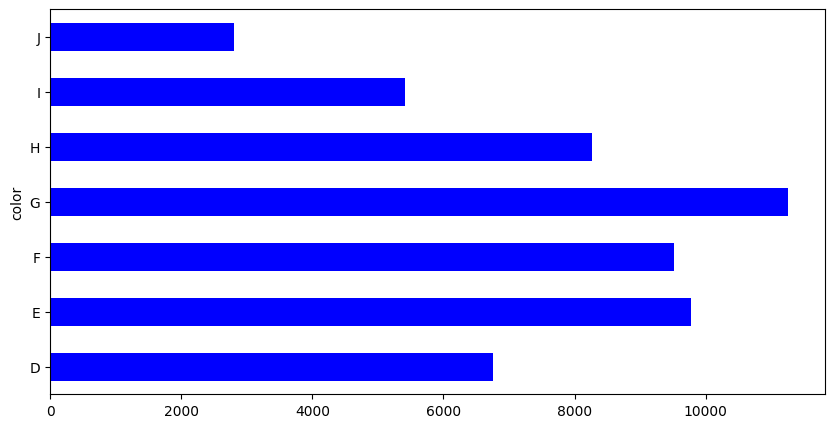

In [477]:
# gd.size().plot(kind='pie')
# gd.size().plot(kind='bar')
# gd.size().plot(kind='line')
gd.size().plot(kind='barh', color = 'blue', figsize=(10,5))

<Axes: xlabel='z', ylabel='price'>

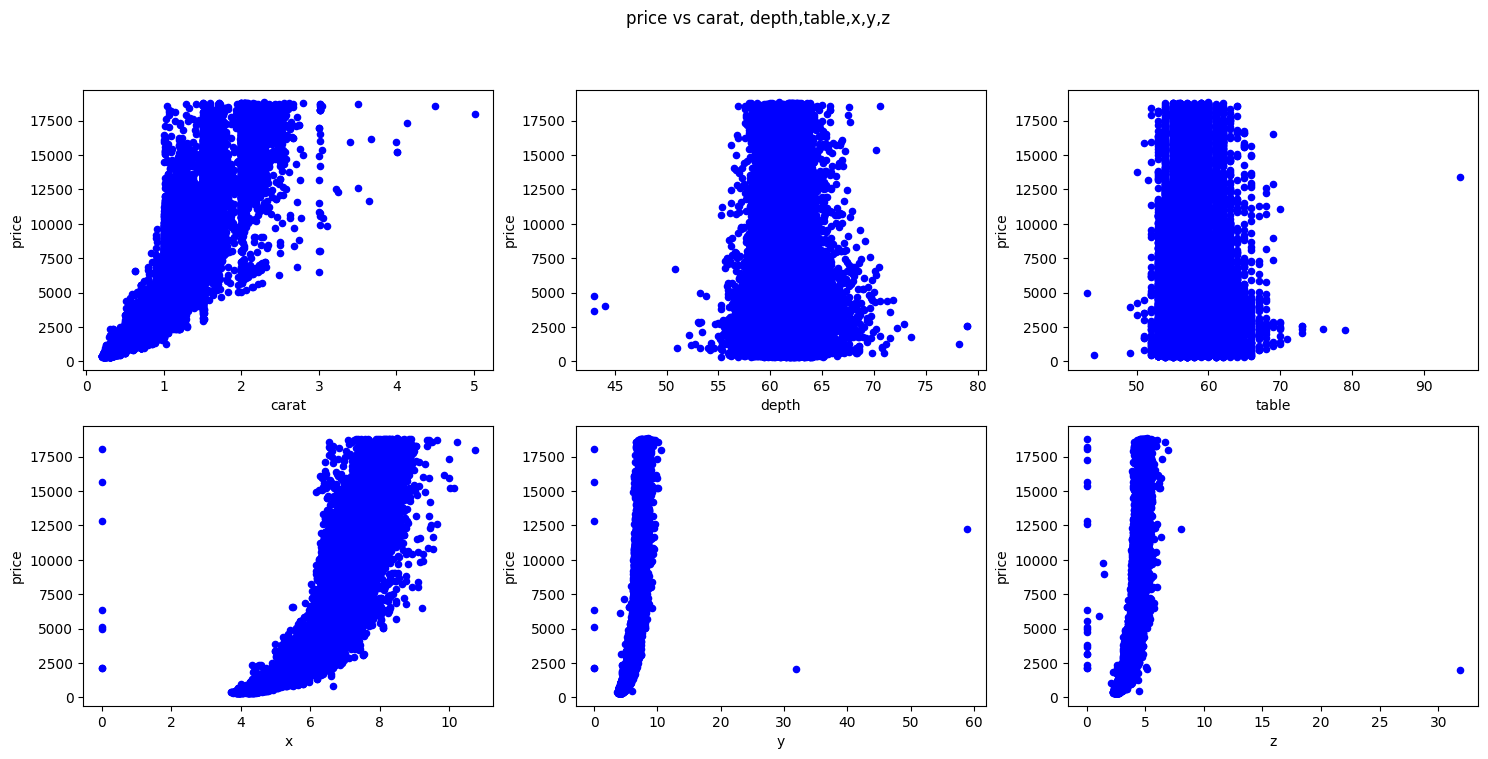

In [478]:
import matplotlib.pyplot as plt

fig, subplot = plt.subplots(nrows= 2, ncols = 3, figsize=(18,8))
fig.suptitle('price vs carat, depth,table,x,y,z')
diamondpricesdata.plot.scatter(x = 'carat', y = "price", color = "blue", ax = subplot[0,0])
diamondpricesdata.plot.scatter(x = 'depth', y = "price", color = "blue", ax = subplot[0,1])
diamondpricesdata.plot.scatter(x = 'table', y = "price", color = "blue", ax = subplot[0,2])
diamondpricesdata.plot.scatter(x = 'x', y = "price", color = "blue", ax = subplot[1,0])
diamondpricesdata.plot.scatter(x = 'y', y = "price", color = "blue", ax = subplot[1,1])
diamondpricesdata.plot.scatter(x = 'z', y = "price", color = "blue", ax = subplot[1,2])

In [479]:
gd = diamondpricesdata.groupby(['clarity'])

In [480]:
gd.size()

clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
dtype: int64

<Axes: title={'center': 'bar graph between clarity'}, xlabel='clarity'>

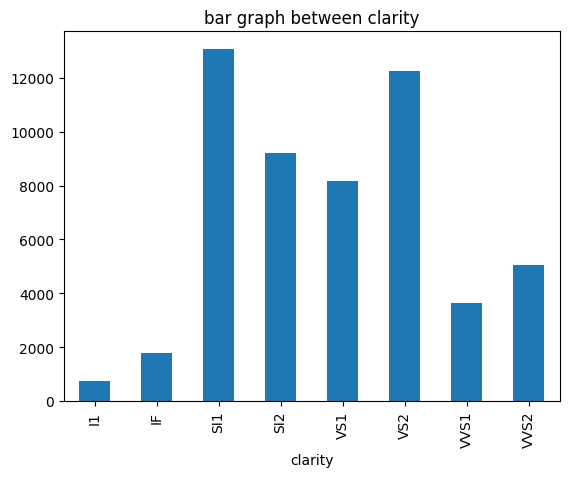

In [481]:
gd.size().plot(kind = 'bar', title = "bar graph between clarity")

<Axes: title={'center': 'price'}, xlabel='clarity'>

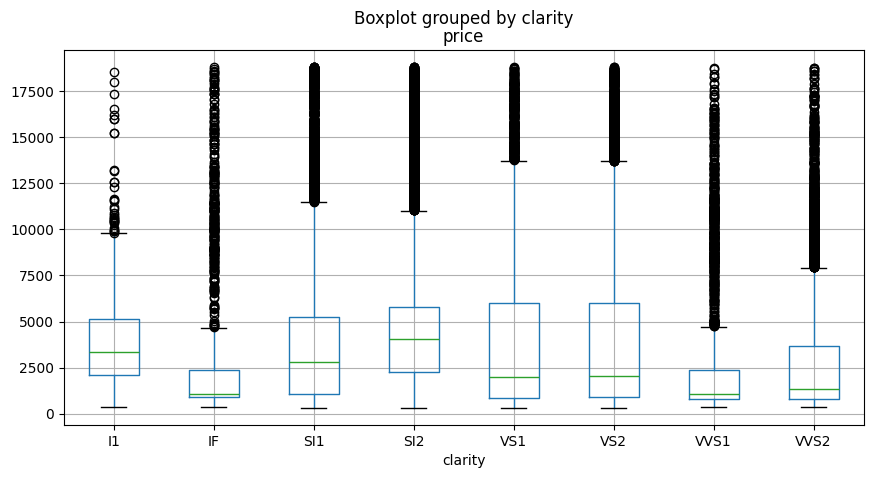

In [482]:
carpricesdata.boxplot(column = 'price', by = 'clarity', figsize= (10,5), vert = True)

In [483]:
def PlotBarCharts(inpdata, colstoplot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig, subplots = plt.subplots(nrows= 1, ncols= len(colstoplot), figsize=(20,5))
    fig.suptitle('Bar chart of: ' + str(colstoplot))
    
    for colname, plotnumber in zip(colstoplot, range(len(colstoplot))):
        inpdata.groupby(colname).size().plot(kind='bar', ax =subplots[plotnumber])

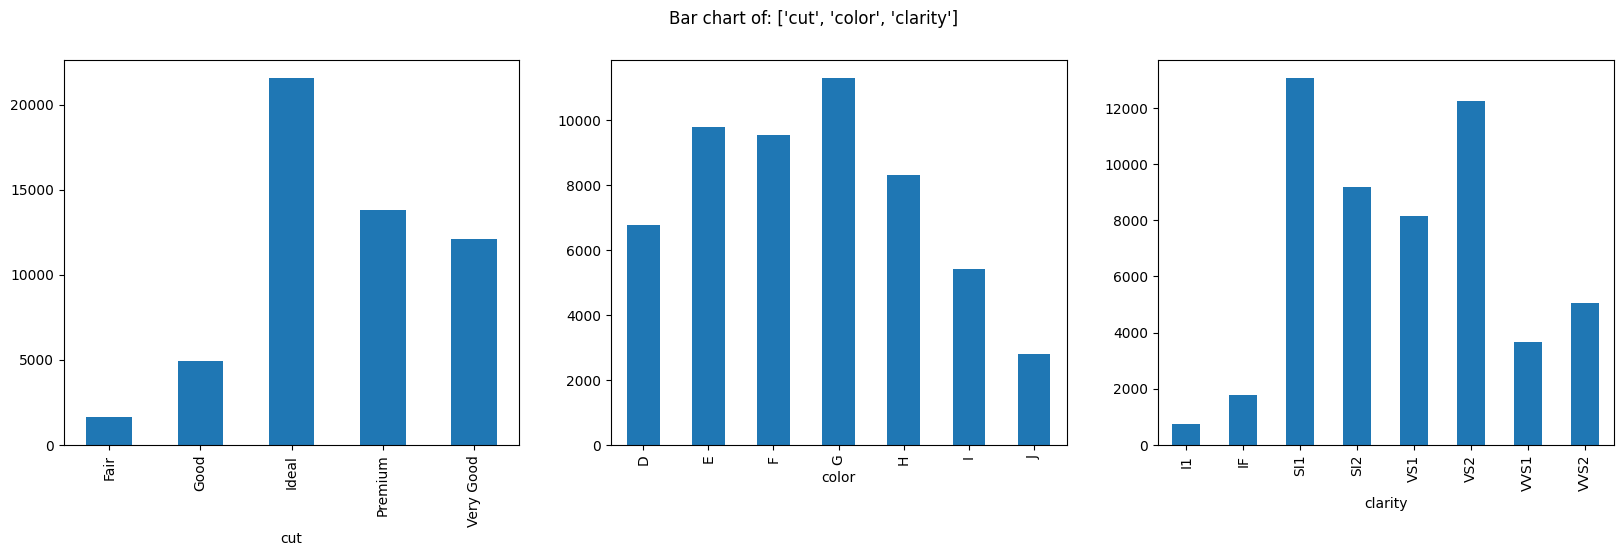

In [484]:
PlotBarCharts(diamondpricesdata, colstoplot = ['cut','color','clarity'])

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

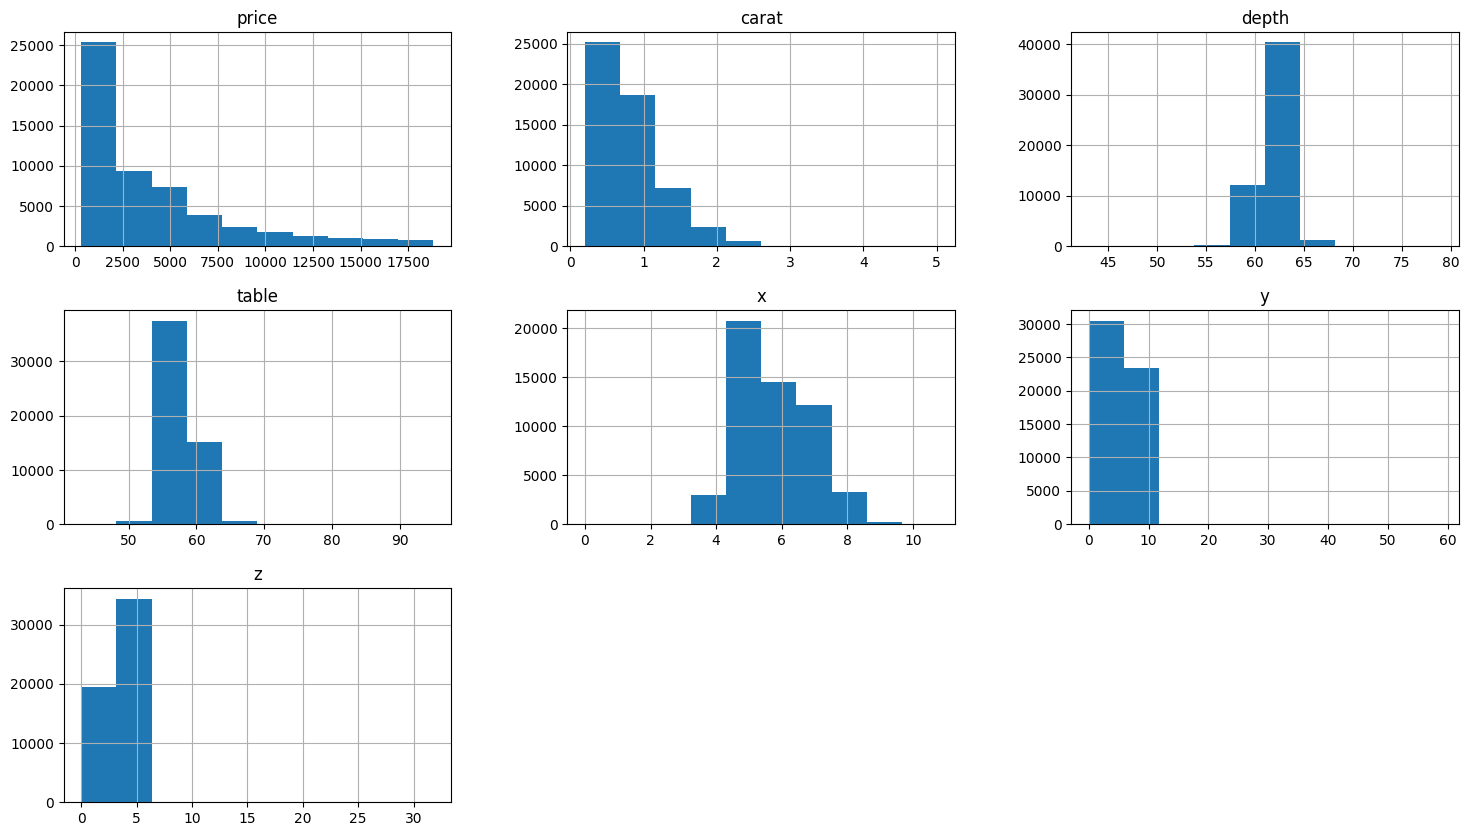

In [485]:
diamondpricesdata.hist(['price','carat','depth','table','x','y','z'],figsize = (18,10))

## Step 7- Outlier Treatment

## Step 8- Missing Value Treatment

In [486]:
diamondpricesdata.isnull()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [487]:
diamondpricesdata.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

<Axes: >

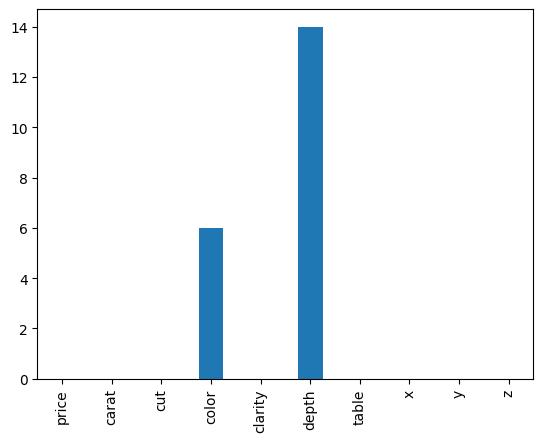

In [488]:
diamondpricesdata.isnull().sum().plot(kind='bar')

In [489]:
diamondpricesdata['color'].mode()

0    G
Name: color, dtype: object

In [490]:
carpricesdata['color'].mode()[0]

'G'

In [491]:
carpricesdata['depth'].mode()[0]

62.0

In [492]:
diamondpricesdata['color'].fillna(value = diamondpricesdata['color'].mode()[0],inplace =True)


diamondpricesdata['depth'].fillna(value =diamondpricesdata['depth'].median(),inplace =True)


In [493]:
diamondpricesdata.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

## Step 9 - Feature Selection (Visual)

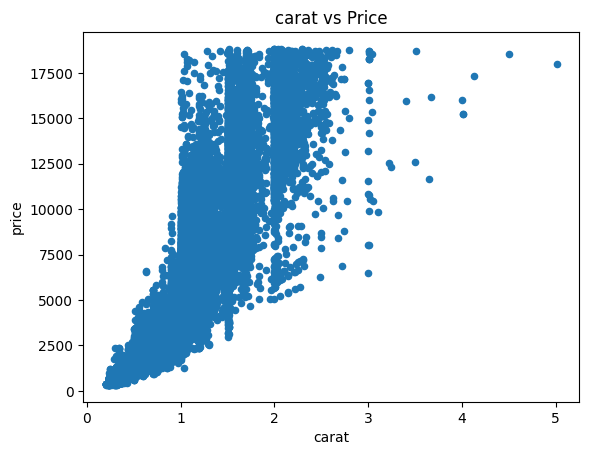

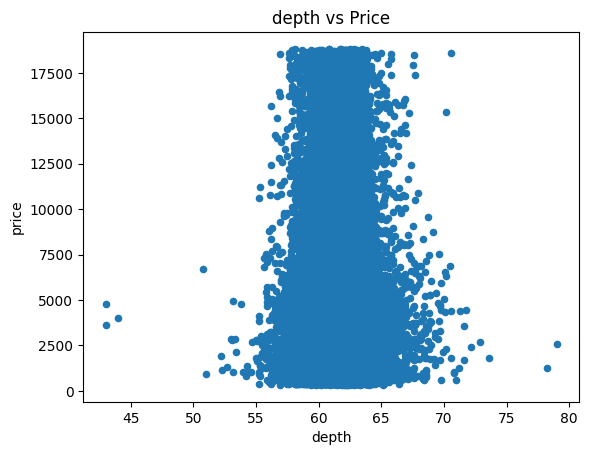

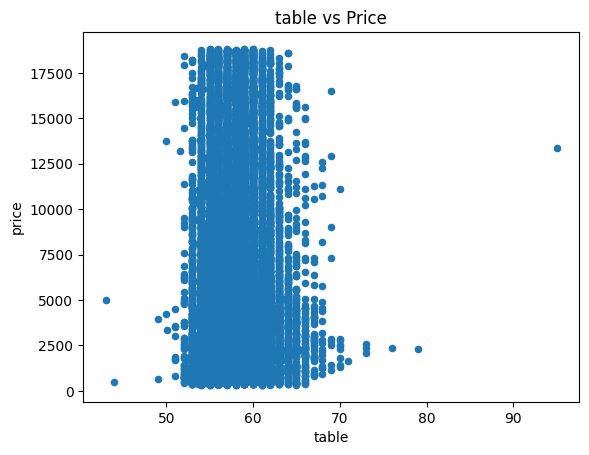

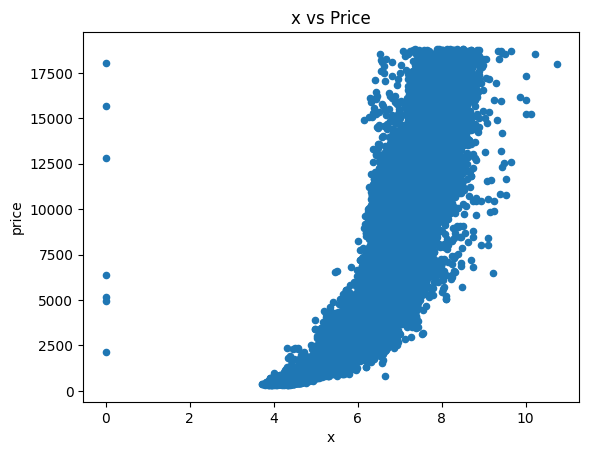

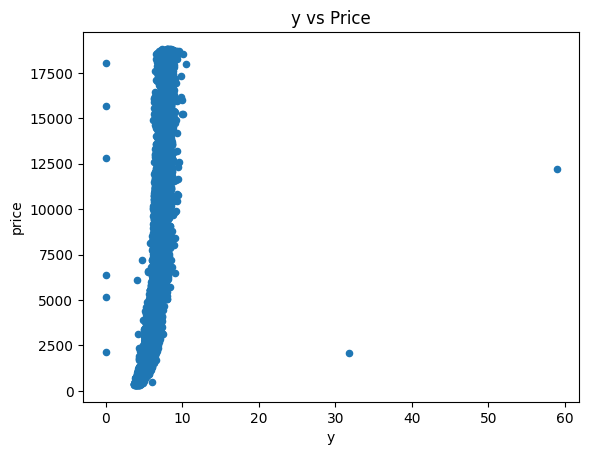

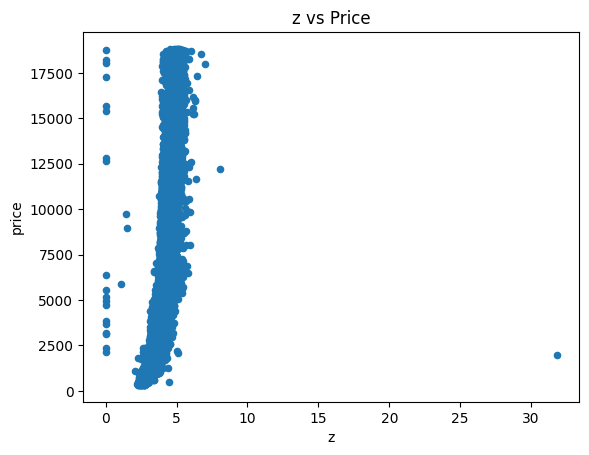

In [494]:
continuouscols = ['carat','depth','table','x','y','z']

for cols in continuouscols:
    carpricesdata.plot.scatter(x =cols, y='price', title = cols + ' vs ' + 'Price')

In [495]:
corrcols = ['price','carat','depth','table','x','y','z']

corrdata = diamondpricesdata[corrcols].corr()
corrdata

,price,carat,depth,table,x,y,z
price,1.000000,0.921591,-0.010651,0.127134,0.884435,0.865421,0.861249
carat,0.921591,1.000000,0.028242,0.181618,0.975094,0.951722,0.953387
depth,-0.010651,0.028242,1.000000,-0.295666,-0.025246,-0.029297,0.094957
table,0.127134,0.181618,-0.295666,1.000000,0.195344,0.183760,0.150929
x,0.884435,0.975094,-0.025246,0.195344,1.000000,0.974701,0.970772
y,0.865421,0.951722,-0.029297,0.183760,0.974701,1.000000,0.952006
z,0.861249,0.953387,0.094957,0.150929,0.970772,0.952006,1.000000


In [496]:
corrdata['price'][abs(corrdata['price']) > 0.5]

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

Final Selected Cols : "carat","x","y","z"

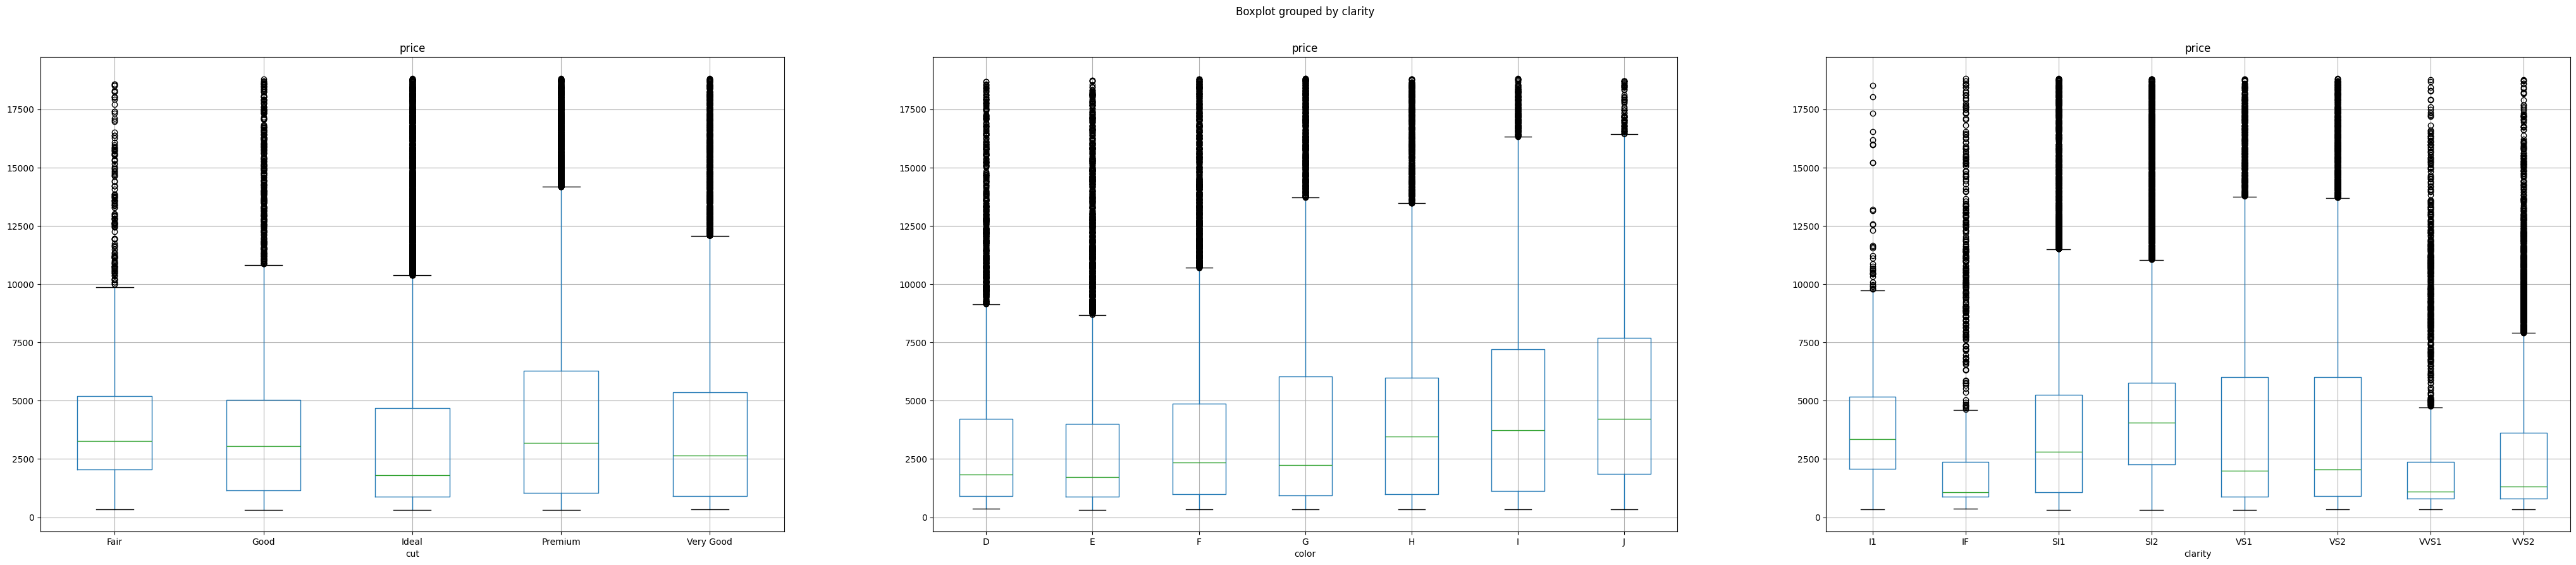

In [497]:
catecols = ['cut','color','clarity']

import matplotlib.pyplot as plt
fig, subplot = plt.subplots(nrows = 1, ncols = len(catecols),figsize = (50,10))
fig.suptitle(f"Price vs {catecols}" )

for cols, col_len in zip(catecols,range(len(catecols))):
    diamondpricesdata.boxplot(column = 'price', by = cols, figsize= (5,5), vert = True, ax = subplot[col_len])

In [498]:
categorygrouplist = carpricesdata.groupby('cut')['price'].apply(list)
categorygrouplist

cut
Fair         [337, 2757, 2759, 2762, 2762, 2763, 2763, 2777...
Good         [327, 335, 339, 351, 351, 351, 402, 402, 402, ...
Ideal        [326, 340, 344, 348, 403, 403, 403, 404, 404, ...
Premium      [326, 334, 342, 345, 345, 355, 403, 404, 404, ...
Very Good    [336, 336, 337, 338, 351, 352, 353, 353, 353, ...
Name: price, dtype: object

In [499]:
def funcANOVA(inpdata, targetvariable, cate_list):
    from scipy.stats import f_oneway
    
    select_cate = []
    
    for pred in cate_list:
        categorygrouplist = inpdata.groupby(pred)[targetvariable].apply(list)
        ANOVA_result = f_oneway(*categorygrouplist)
        
        if (ANOVA_result[1] < 0.05):
            print(pred, 'is correlated with', targetvariable,'| P-Value:',ANOVA_result[1])
            select_cate.append(pred)
        else:
            print(pred, 'is not correlated with', targetvariable,'| P-Value:',ANOVA_result[1])
        
    return select_cate
    

In [500]:
cate_list = ['cut','color','clarity']
funcANOVA(diamondpricesdata,'price',cate_list )

cut is correlated with price | P-Value: 8.42830730759452e-150
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.9190895e-316


['cut', 'color', 'clarity']

In [501]:
selectedcols = [ "carat","x","y","z",'cut', 'color', 'clarity']
DataForML = diamondpricesdata[selectedcols]
DataForML

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2
...,...,...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,Ideal,D,SI1
53936,0.72,5.69,5.75,3.61,Good,D,SI1
53937,0.70,5.66,5.68,3.56,Very Good,D,SI1
53938,0.86,6.15,6.12,3.74,Premium,H,SI2


In [502]:
import os
os.getcwd()

'C:\\Users\\Administrator\\Project Machine Learning\\Diamond Price Predictor'

In [503]:
DataForML.to_pickle('DataForML.pkl')

In [504]:
import pandas as pd
DataForML = pd.read_pickle('DataForML.pkl')

In [505]:
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


## Step 10 - Data pre-processing for ML

In [506]:
DataForML_Numeric = pd.get_dummies(DataForML)

In [507]:
DataForML_Numeric['price'] = diamondpricesdata['price']

In [508]:
DataForML_Numeric.head(10)

,carat,x,y,z,cut_Fair,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,3.95,3.98,2.43,False,...,False,False,False,False,326
1,0.21,3.89,3.84,2.31,False,...,False,False,False,False,326
2,0.23,4.05,4.07,2.31,False,...,True,False,False,False,327
3,0.29,4.20,4.23,2.63,False,...,False,True,False,False,334
4,0.31,4.34,4.35,2.75,False,...,False,False,False,False,335
5,0.24,3.94,3.96,2.48,False,...,False,False,False,True,336
6,0.24,3.95,3.98,2.47,False,...,False,False,True,False,336
7,0.26,4.07,4.11,2.53,False,...,False,False,False,False,337
8,0.22,3.87,3.78,2.49,True,...,False,True,False,False,337
9,0.23,4.00,4.05,2.39,False,...,True,False,False,False,338


## Step 11 - Splitting Data into Training and Testing

In [509]:
DataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [510]:
TargetVar = 'price'
Pred = ['carat', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2']

X = DataForML_Numeric[Pred].values
y = DataForML_Numeric[TargetVar].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 41)

In [511]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37758, 24)
(16182, 24)
(37758,)
(16182,)


In [512]:
# np.set_printoptions(suppress = True)
X_train[0:10]

array([[1.0, 6.25, 6.35, 3.97, False, True, False, False, False, False,
        False, False, True, False, False, False, False, False, False,
        False, False, True, False, False],
       [0.57, 5.29, 5.26, 3.28, False, False, False, True, False, False,
        True, False, False, False, False, False, False, False, False,
        False, False, True, False, False],
       [1.0, 6.38, 6.42, 3.92, False, False, False, True, False, False,
        False, False, False, True, False, False, False, False, False,
        True, False, False, False, False],
       [1.32, 6.9, 6.83, 4.45, True, False, False, False, False, False,
        False, False, False, False, True, False, False, False, True,
        False, False, False, False, False],
       [0.31, 4.38, 4.35, 2.67, False, False, False, True, False, True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, True, False],
       [0.86, 6.04, 5.98, 3.77, False, False, False, True, False, False,


In [388]:
y_train[0:10]

array([5723, 2274, 3850, 6061, 1075, 2851, 4277, 4751, 1219, 2757],
      dtype=int64)

## Step - 12 Trying Different Algorithm



### 1. Multiple Linear Regression Algorithm

In [189]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

print(RegModel)

LREG = RegModel.fit(X_train, y_train)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))



print('\n ####Model Validation and Accuracy Calculations####')

prediction = LREG.predict(X_test)
TestingDataResults  = pd.DataFrame(data = X_test, columns = Pred)
TestingDataResults[TargetVar]= y_test
TestingDataResults['predicted '+ TargetVar] = np.round(prediction)
print(TestingDataResults.head(10))

TestingDataResults['APE'] = 100*(abs(
    TestingDataResults['price']-TestingDataResults['predicted price'])/TestingDataResults['price'])

print(TestingDataResults[['price','predicted price','APE']].head())

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data',Accuracy,'%')
print('Median Accuracy on test data',MedianAccuracy,'%')


def Accuracy_score(orig,pred):
    MAPE =np.mean(100* abs(orig-pred)/orig)
    return (100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring  = make_scorer(Accuracy_score, greater_is_better= True)

from sklearn.model_selection import cross_val_score
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_scoring)

print('\n Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


LinearRegression()
R2 Value: 0.9218857298756398

 ####Model Validation and Accuracy Calculations####
  carat     x     y     z cut_Fair  ... clarity_VS2 clarity_VVS1 clarity_VVS2  \
0  0.51  5.11  5.14  3.17    False  ...       False        False         True   
1  0.54  5.24  5.22  3.16    False  ...       False        False        False   
2  0.71  5.67  5.69  3.55    False  ...       False        False        False   
3  0.41  4.74  4.71  3.01    False  ...       False        False        False   
4  0.42  4.82  4.78  2.96    False  ...       False        False         True   
5  0.31  4.32  4.35  2.68    False  ...       False        False        False   
6   1.5  7.27  7.21  4.53    False  ...        True        False        False   
7  0.41  4.81  4.85   2.9    False  ...       False        False         True   
8  0.55  5.31  5.28  3.23    False  ...        True        False        False   
9  1.04  6.61  6.53   4.0    False  ...       False         True        False   

   pric

In [256]:
TestingDataResults['priceAVG']= TestingDataResults['price'].mean()

In [257]:
TestingDataResults.head(5)

,carat,x,y,z,cut_Fair,...,clarity_VVS2,price,predicted price,APE,priceAVG
0,0.51,5.11,5.14,3.17,False,...,True,2041,2597.0,27.241548,3949.571685
1,0.54,5.24,5.22,3.16,False,...,False,1786,1847.0,3.415454,3949.571685
2,0.71,5.67,5.69,3.55,False,...,False,2604,2897.0,11.251920,3949.571685
3,0.41,4.74,4.71,3.01,False,...,False,904,343.0,62.057522,3949.571685
4,0.42,4.82,4.78,2.96,False,...,True,1221,1925.0,57.657658,3949.571685


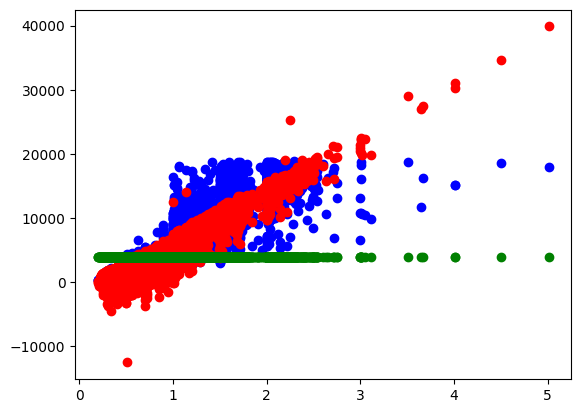

In [258]:
%matplotlib inline
import matplotlib.pyplot as plt
# TestingDataResults.plot.scatter(x= 'Age',y='Price',color = 'blue')
# TestingDataResults.plot.scatter(x= 'Age',y='Predicted Price',color = 'red')
# TestingDataResults.plot.scatter(x= 'Age',y='PriceAVG',color = 'green')

plt.scatter(x=TestingDataResults['carat'],y = TestingDataResults['price'],color = 'blue')
plt.scatter(x=TestingDataResults['carat'],y = TestingDataResults['predicted price'],color = 'red')
plt.scatter(x=TestingDataResults['carat'],y = TestingDataResults['priceAVG'],color = 'green')

In [259]:
LREG.coef_

array([ 1.14491612e+04, -8.26503265e+02,  3.38163413e+01, -5.16069711e+02,
       -2.06126472e+14, -2.06126472e+14, -2.06126472e+14, -2.06126472e+14,
       -2.06126472e+14,  7.99286199e+12,  7.99286199e+12,  7.99286199e+12,
        7.99286199e+12,  7.99286199e+12,  7.99286199e+12,  7.99286199e+12,
       -1.01388560e+12, -1.01388560e+12, -1.01388560e+12, -1.01388560e+12,
       -1.01388560e+12, -1.01388560e+12, -1.01388560e+12, -1.01388560e+12])

In [260]:
LREG.intercept_

199147495849477.2

## 2. Decision Tree

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.8750580003878181

 ####Model Validation and Accuracy Calculations####
  carat     x     y     z cut_Fair  ... clarity_VS2 clarity_VVS1 clarity_VVS2  \
0  0.51  5.11  5.14  3.17    False  ...       False        False         True   
1  0.54  5.24  5.22  3.16    False  ...       False        False        False   
2  0.71  5.67  5.69  3.55    False  ...       False        False        False   
3  0.41  4.74  4.71  3.01    False  ...       False        False        False   
4  0.42  4.82  4.78  2.96    False  ...       False        False         True   
5  0.31  4.32  4.35  2.68    False  ...       False        False        False   
6   1.5  7.27  7.21  4.53    False  ...        True        False        False   
7  0.41  4.81  4.85   2.9    False  ...       False        False         True   
8  0.55  5.31  5.28  3.23    False  ...        True        False        False   
9  1.04  6.61  6.53   4.0    False  ...       False         True        F

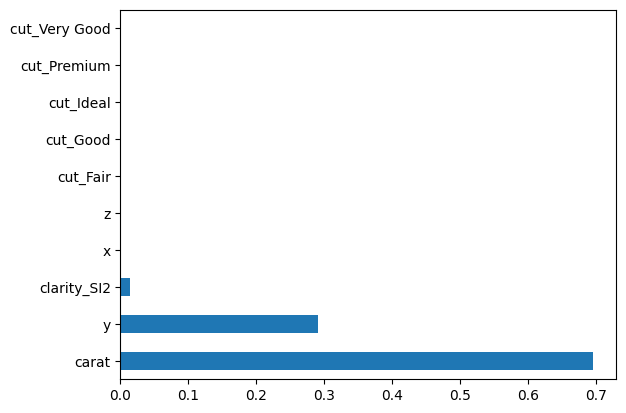

In [261]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth= 3, criterion= 'squared_error')

print(RegModel)

DT = RegModel.fit(X_train, y_train)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Pred)
feature_importances.nlargest(10).plot(kind='barh')
print('\n ####Model Validation and Accuracy Calculations####')

prediction = DT.predict(X_test)
TestingDataResults  = pd.DataFrame(data = X_test, columns = Pred)
TestingDataResults[TargetVar]= y_test
TestingDataResults['predicted '+ TargetVar] = np.round(prediction)
print(TestingDataResults.head(10))

TestingDataResults['APE'] = 100*(abs(
    TestingDataResults['price']-TestingDataResults['predicted price'])/TestingDataResults['price'])

print(TestingDataResults[['price','predicted price','APE']].head())

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data',Accuracy,'%')
print('Median Accuracy on test data',MedianAccuracy,'%')


def Accuracy_score(orig,pred):
    MAPE =np.mean(100* abs(orig-pred)/orig)
    return (100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring  = make_scorer(Accuracy_score, greater_is_better= True)

from sklearn.model_selection import cross_val_score
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_scoring)

print('\n Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="carat <= 0.995\nsquared_error = 15862611.643\nsamples = 37758\nvalue = 3925.612"] ;
1 [label="y <= 5.535\nsquared_error = 1237336.139\nsamples = 24422\nvalue = 1629.854"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="y <= 4.995\nsquared_error = 274558.752\nsamples = 17527\nvalue = 1061.39"] ;
1 -> 2 ;
3 [label="squared_error = 58574.579\nsamples = 12288\nvalue = 790.062"] ;
2 -> 3 ;
4 [label="squared_error = 203475.977\nsamples = 5239\nvalue = 1697.785"] ;
2 -> 4 ;
5 [label="y <= 6.015\nsquared_error = 775152.068\nsamples = 6895\nvalue = 3074.882"] ;
1 -> 5 ;
6 [label="squared_error = 370245.744\nsamples = 4730\nvalue = 2703.363"] ;
5 -> 6 ;
7 [label="squared_error = 699396.592\nsamples = 2165\nvalue = 3886.561"] ;
5 -> 7 ;
8 [label="y <= 7.195\nsquared_error = 15318694.29\nsamples = 13336\nvalue = 8129.795"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel=

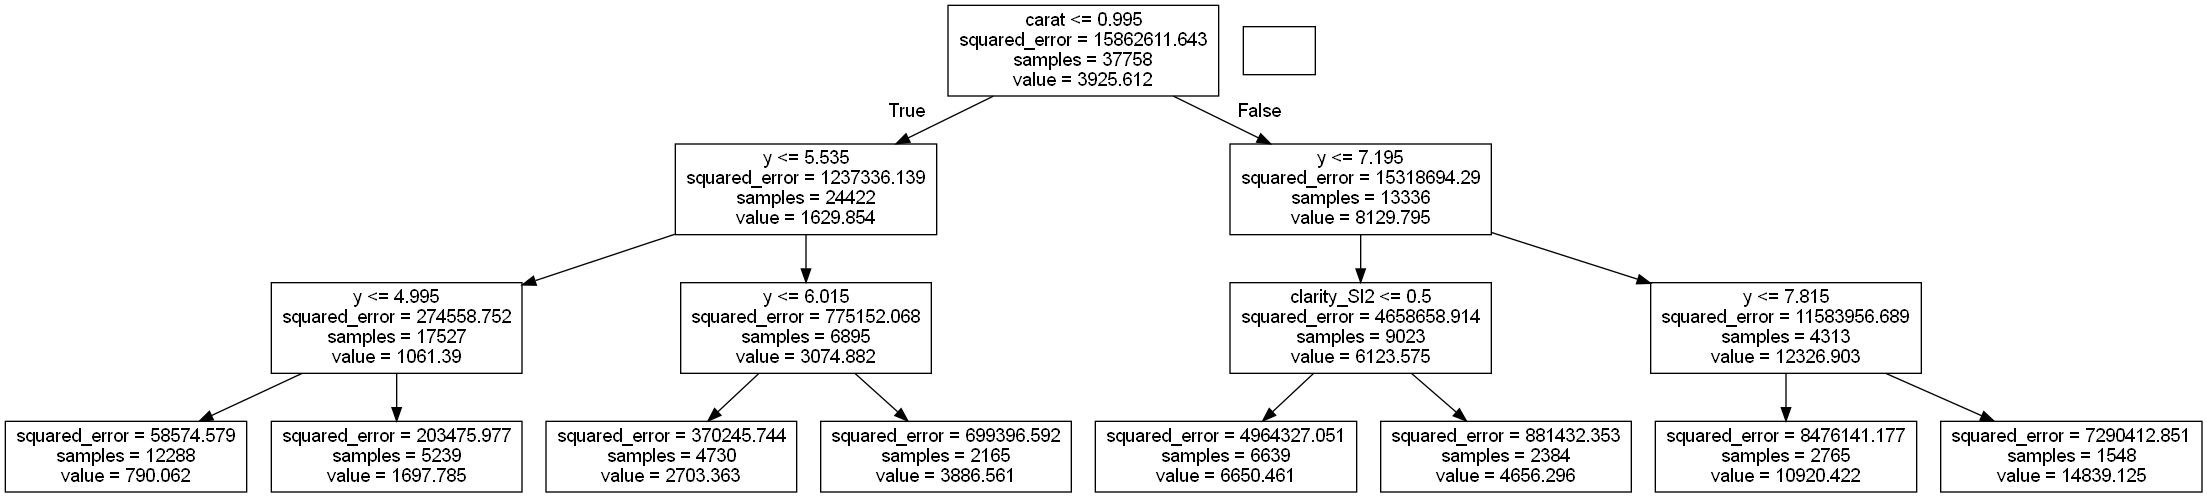

In [262]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel, out_file = None, feature_names= Pred, class_names= list(TargetVar))

print(dot_data)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png(), width = 1200, height = 900)

## 3. Random Forest

In [324]:
TestingDataResults.columns

Index(['carat', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'price', 'predicted price', 'APE'],
      dtype='object')

R2 Value: 0.8337904512930626

 ####Model Validation and Accuracy Calculations####
  carat     x     y     z cut_Fair  ... clarity_VS2 clarity_VVS1 clarity_VVS2  \
0  0.51  5.11  5.14  3.17    False  ...       False        False         True   
1  0.54  5.24  5.22  3.16    False  ...       False        False        False   
2  0.71  5.67  5.69  3.55    False  ...       False        False        False   
3  0.41  4.74  4.71  3.01    False  ...       False        False        False   
4  0.42  4.82  4.78  2.96    False  ...       False        False         True   
5  0.31  4.32  4.35  2.68    False  ...       False        False        False   
6   1.5  7.27  7.21  4.53    False  ...        True        False        False   
7  0.41  4.81  4.85   2.9    False  ...       False        False         True   
8  0.55  5.31  5.28  3.23    False  ...        True        False        False   
9  1.04  6.61  6.53   4.0    False  ...       False         True        False   

   price predicted price  

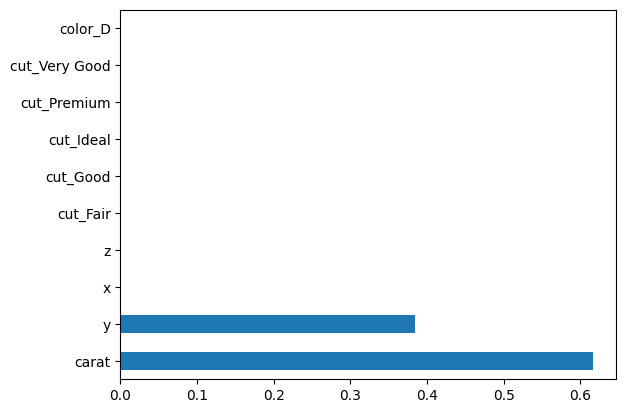

In [325]:
#Random Forest (Bagging of multiple Decision Trees) 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=100, criterion='squared_error')

RF = RegModel.fit(X_train, y_train)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Pred)
feature_importances.nlargest(10).plot(kind='barh')
print('\n ####Model Validation and Accuracy Calculations####')

prediction = RF.predict(X_test)
TestingDataResults  = pd.DataFrame(data = X_test, columns = Pred)
TestingDataResults[TargetVar]= y_test
TestingDataResults['predicted '+ TargetVar] = np.round(prediction)
print(TestingDataResults.head(10))

TestingDataResults['APE'] = 100*(abs(
    TestingDataResults['price']-TestingDataResults['predicted price'])/TestingDataResults['price'])

print(TestingDataResults[['price','predicted price','APE']].head())

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data',Accuracy,'%')
print('Median Accuracy on test data',MedianAccuracy,'%')


def Accuracy_score(orig,pred):
    MAPE =np.mean(100* abs(orig-pred)/orig)
    return (100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring  = make_scorer(Accuracy_score, greater_is_better= True)

from sklearn.model_selection import cross_val_score
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_scoring)

print('\n Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))




### Plotting one of the Decision Trees in Random Forest

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="carat <= 0.995\nsquared_error = 15831042.372\nsamples = 23855\nvalue = 3908.278"] ;
1 [label="y <= 5.425\nsquared_error = 1226254.038\nsamples = 15450\nvalue = 1623.062"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="squared_error = 244611.73\nsamples = 10799\nvalue = 1029.756"] ;
1 -> 2 ;
3 [label="squared_error = 805548.086\nsamples = 4651\nvalue = 2991.68"] ;
1 -> 3 ;
4 [label="y <= 7.215\nsquared_error = 15378686.338\nsamples = 8405\nvalue = 8121.418"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="squared_error = 4892252.715\nsamples = 5739\nvalue = 6155.501"] ;
4 -> 5 ;
6 [label="squared_error = 11627590.833\nsamples = 2666\nvalue = 12372.089"] ;
4 -> 6 ;
}


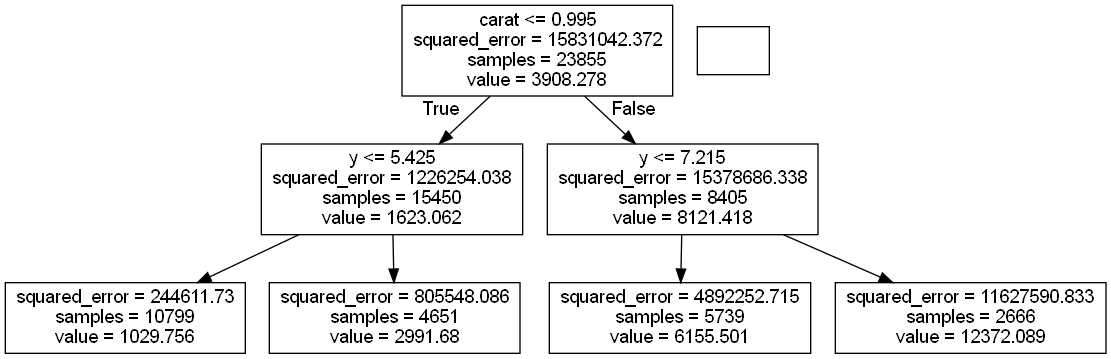

In [327]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel.estimators_[2], out_file = None, feature_names= Pred, class_names= list(TargetVar))

print(dot_data)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png(), width = 1200, height = 900)

## 4. AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.01, n_estimators=300)
R2 Value: 0.8391076883016934

 ####Model Validation and Accuracy Calculations####
  carat     x     y     z cut_Fair  ... clarity_VS2 clarity_VVS1 clarity_VVS2  \
0  0.51  5.11  5.14  3.17    False  ...       False        False         True   
1  0.54  5.24  5.22  3.16    False  ...       False        False        False   
2  0.71  5.67  5.69  3.55    False  ...       False        False        False   
3  0.41  4.74  4.71  3.01    False  ...       False        False        False   
4  0.42  4.82  4.78  2.96    False  ...       False        False         True   
5  0.31  4.32  4.35  2.68    False  ...       False        False        False   
6   1.5  7.27  7.21  4.53    False  ...        True        False        False   
7  0.41  4.81  4.85   2.9    False  ...       False        False         True   
8  0.55  5.31  5.28  3.23    False  ...        True        False

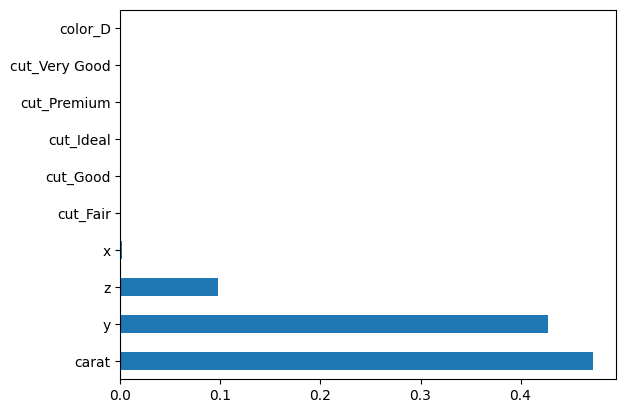

In [389]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor (max_depth=2)
RegModel = AdaBoostRegressor (n_estimators=300, base_estimator=DTR, learning_rate=0.01)

AD = RegModel.fit(X_train, y_train)
print(AD)
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, AD.predict(X_train)))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AD.feature_importances_, index=Pred)
feature_importances.nlargest(10).plot(kind='barh')
print('\n ####Model Validation and Accuracy Calculations####')

prediction = AD.predict(X_test)
TestingDataResults  = pd.DataFrame(data = X_test, columns = Pred)
TestingDataResults[TargetVar]= y_test
TestingDataResults['predicted '+ TargetVar] = np.round(prediction)
print(TestingDataResults.head(10))

TestingDataResults['APE'] = 100*(abs(
    TestingDataResults['price']-TestingDataResults['predicted price'])/TestingDataResults['price'])

print(TestingDataResults[['price','predicted price','APE']].head())

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data',Accuracy,'%')
print('Median Accuracy on test data',MedianAccuracy,'%')


def Accuracy_score(orig,pred):
    MAPE =np.mean(100* abs(orig-pred)/orig)
    return (100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring  = make_scorer(Accuracy_score, greater_is_better= True)

from sklearn.model_selection import cross_val_score
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_scoring)

print('\n Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



### Plotting one of the Decision trees from Adaboost

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="carat <= 0.995\nsquared_error = 15848084.822\nsamples = 37758\nvalue = 3911.83"] ;
1 [label="carat <= 0.605\nsquared_error = 1244155.777\nsamples = 24459\nvalue = 1623.038"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="squared_error = 250916.93\nsamples = 17251\nvalue = 1037.44"] ;
1 -> 2 ;
3 [label="squared_error = 836299.069\nsamples = 7208\nvalue = 3024.559"] ;
1 -> 3 ;
4 [label="y <= 7.195\nsquared_error = 15352982.232\nsamples = 13299\nvalue = 8121.285"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="squared_error = 4650666.099\nsamples = 9031\nvalue = 6116.973"] ;
4 -> 5 ;
6 [label="squared_error = 11511623.419\nsamples = 4268\nvalue = 12362.368"] ;
4 -> 6 ;
}


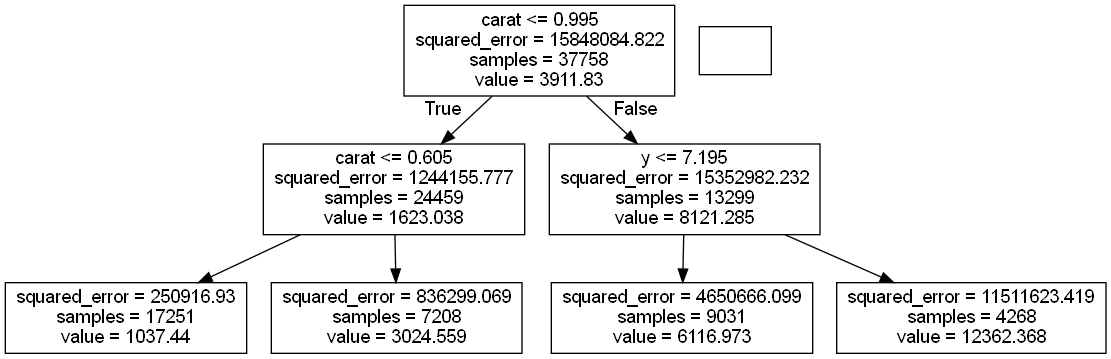

In [390]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel.estimators_[2], out_file = None, feature_names= Pred, class_names= list(TargetVar))

print(dot_data)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png(), width = 1200, height = 900)

## 5. XGBoost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 Value: 0.9862512634974174

 ####Model Validation and Accuracy Calculations####
  carat     x     y     z cut_Fair  ... clarity_VS2 clarity_VVS1 clarity_VVS2  \
0  0.51  5.11  5.14  3.17    False  ...       False        False         True   
1  0.54  5

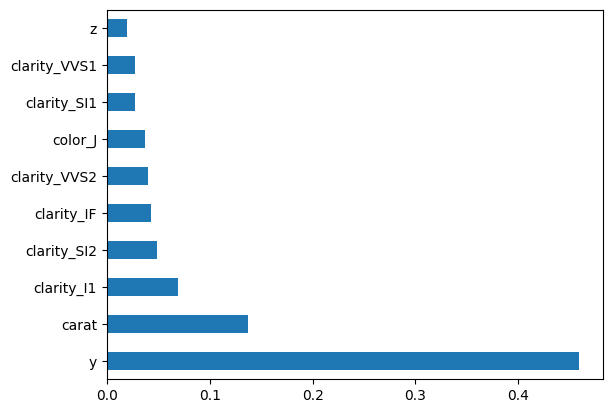

In [451]:
import xgboost
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split
RegModel = XGBRegressor(max_depth=5,
                        learning_rate=0.1,
                        n_estimators=300,
                        objective='reg:squarederror',
                        booster='gbtree',
                        )
XGB = RegModel.fit(X_train, y_train)
print(XGB)
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Pred)
feature_importances.nlargest(10).plot(kind='barh')
print('\n ####Model Validation and Accuracy Calculations####')

prediction = XGB.predict(X_test)
TestingDataResults  = pd.DataFrame(data = X_test, columns = Pred)
TestingDataResults[TargetVar]= y_test
TestingDataResults['predicted '+ TargetVar] = np.round(prediction)
print(TestingDataResults.head(10))

TestingDataResults['APE'] = 100*(abs(
    TestingDataResults['price']-TestingDataResults['predicted price'])/TestingDataResults['price'])

print(TestingDataResults[['price','predicted price','APE']].head())

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data',Accuracy,'%')
print('Median Accuracy on test data',MedianAccuracy,'%')


def Accuracy_score(orig,pred):
    MAPE =np.mean(100* abs(orig-pred)/orig)
    return (100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring  = make_scorer(Accuracy_score, greater_is_better= True)

from sklearn.model_selection import cross_val_score
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_scoring)

print('\n Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



### Plotting a single Decision tree out of XGBoost

<Axes: >

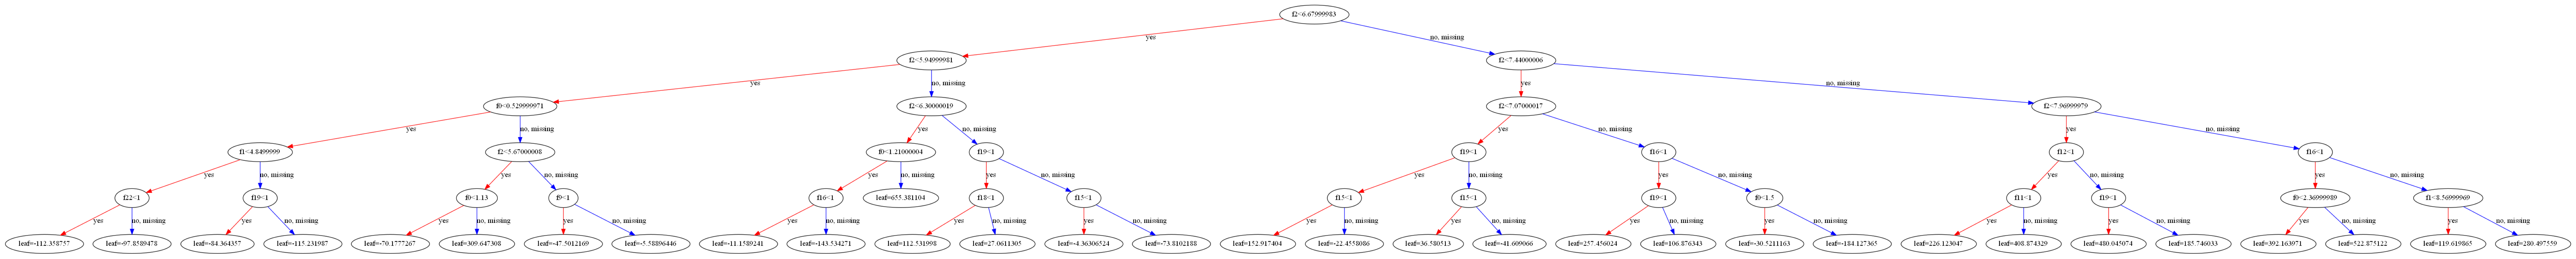

In [452]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 40))
plot_tree (XGB, num_trees=10, ax=ax)
# Double click on the graph to zoom in

## 6. KNN

In [513]:
from sklearn.neighbors import KNeighborsRegressor 
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print (RegModel)

KNN = RegModel.fit(X_train, y_train)
print(KNN)
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))


prediction = KNN.predict(X_test)
TestingDataResults  = pd.DataFrame(data = X_test, columns = Pred)
TestingDataResults[TargetVar]= y_test
TestingDataResults['predicted '+ TargetVar] = np.round(prediction)
print(TestingDataResults.head(10))

TestingDataResults['APE'] = 100*(abs(
    TestingDataResults['price']-TestingDataResults['predicted price'])/TestingDataResults['price'])

print(TestingDataResults[['price','predicted price','APE']].head())

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data',Accuracy,'%')
print('Median Accuracy on test data',MedianAccuracy,'%')


def Accuracy_score(orig,pred):
    MAPE =np.mean(100* abs(orig-pred)/orig)
    return (100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring  = make_scorer(Accuracy_score, greater_is_better= True)

from sklearn.model_selection import cross_val_score
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_scoring)

print('\n Accuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



KNeighborsRegressor(n_neighbors=3)
KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9868551288058661
  carat     x     y     z cut_Fair  ... clarity_VS2 clarity_VVS1 clarity_VVS2  \
0  0.51  5.11  5.14  3.17    False  ...       False        False         True   
1  0.54  5.24  5.22  3.16    False  ...       False        False        False   
2  0.71  5.67  5.69  3.55    False  ...       False        False        False   
3  0.41  4.74  4.71  3.01    False  ...       False        False        False   
4  0.42  4.82  4.78  2.96    False  ...       False        False         True   
5  0.31  4.32  4.35  2.68    False  ...       False        False        False   
6   1.5  7.27  7.21  4.53    False  ...        True        False        False   
7  0.41  4.81  4.85   2.9    False  ...       False        False         True   
8  0.55  5.31  5.28  3.23    False  ...        True        False        False   
9  1.04  6.61  6.53   4.0    False  ...       False         True        False   

   price 